<a href="https://colab.research.google.com/github/feodosiya/Classical_ML_HSE/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22AI_HW2_GD_base_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

```Отправлено отдельно в anytask```

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [1]:
import numpy as np
import sympy as sp
from IPython.display import display, Math

x = sp.Symbol('x')

functions = [
    ("a", "f", lambda x: x**2 - 30*x + 1),
    ("b", "g", lambda x: -x**3 + 5*x - 7*x**2 + 17),
    ("c", "h", lambda x: x**2 - 1/x),
    ("d", "j", lambda x: 1/x**5 + x**17 + 8)
]

for label, derivative_n, func in functions:
    derivative = sp.diff(func(x))  # Производная
    critical_points = sp.solve(derivative, x)  # Критические точки

    display(Math(f"{label}) \\; {derivative_n}'(x) = {sp.latex(derivative)}"))
    display(Math(f"\\text{{Критические точки: }} {sp.latex(critical_points)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2]:
for label, derivative_n, func in functions:
    first_derivative = sp.diff(func(x))
    second_derivative = sp.diff(first_derivative)
    critical_points = sp.solve(first_derivative, x)

    display(Math(f"{label}) \\; {derivative_n}'(x) = {sp.latex(first_derivative)}"))

    for point in critical_points:
        if point.is_real:
            second_val = second_derivative.subs(x, point).evalf()  # значение 2 производной в точке

            if second_val > 0:
                point_type = "минимума"
            elif second_val < 0:
                point_type = "максимума"
            else:
                point_type = "2 производная = 0"

            display(Math(f"\\text{{Критическая точка в }} x = {sp.latex(point)} \\; \\text{{является точкой}} \\; {point_type}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

```Отправлено отдельно в anytask```

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [3]:
def f(x):
  return x**2 - 30*x + 1

def g(x):
  return -x**3 + 5*x - 7*x**2 + 17

def h(x):
  return x**2 - 1/x

def j(x):
  return 1/x**5 + x**17 + 8

#df_x = sp.diff(f(x))
#d2f_x = sp.diff(df_x)
#sp.solve(d2f_x, x)

In [4]:
from sympy import *

def check_inflection_points(func):
    second_derivative = diff(func, x, 2)
    critical_points = solve(second_derivative, x)

    inflection_points = []

    for point in critical_points:
      if point.is_real:
        left_value = second_derivative.subs(x, point - 0.1)
        right_value = second_derivative.subs(x, point + 0.1)

        if left_value * right_value < 0:
            inflection_points.append(point)

    return inflection_points

functions = {'f(x)': f(x), 'g(x)': g(x), 'h(x)': h(x), 'j(x)': j(x)}
for func_name, func in functions.items():
    inflection_points = check_inflection_points(func)
    print(f"{func_name} имеет точки перегиба в: {inflection_points}")


f(x) имеет точки перегиба в: []
g(x) имеет точки перегиба в: [-7/3]
h(x) имеет точки перегиба в: [1]
j(x) имеет точки перегиба в: []


### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

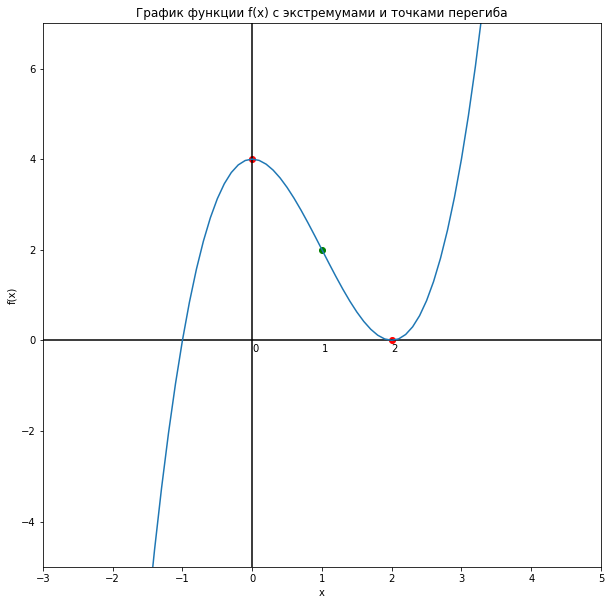

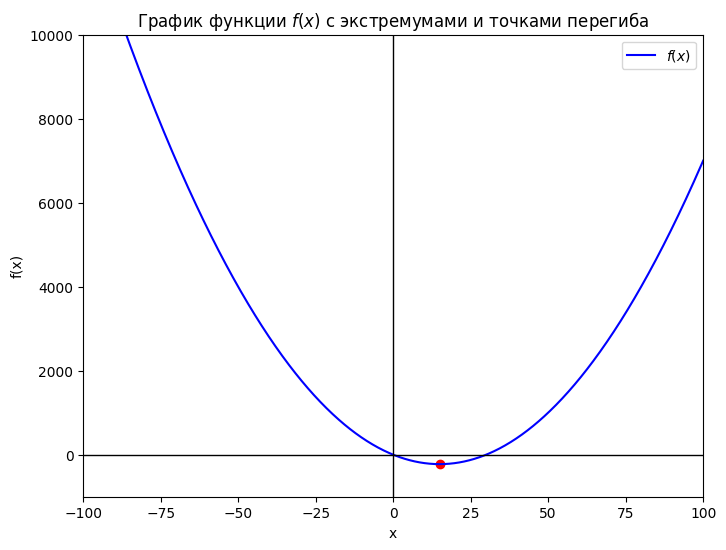

In [5]:
import matplotlib.pyplot as plt

def find_extr(func):
  first_derivative = sp.diff(func(x), x)
  second_derivative = sp.diff(first_derivative)
  critical_points = sp.solve(first_derivative, x)
  extrema_x = np.array([float(cp) for cp in critical_points if cp.is_real])
  extrema_y = np.array([float(func(cp)) for cp in extrema_x])

  return extrema_x, extrema_y


x_values = np.linspace(-100, 100, 1000)
y_values = f(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, color='blue', label=fr'$f(x)$')
plt.title(r'График функции $f(x)$ с экстремумами и точками перегиба')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()

extrema_x, extrema_y = find_extr(f)
plt.scatter(extrema_x, extrema_y, c='red')

plt.xlim([-100, 100])
plt.ylim([-1000, 10000])

plt.show()

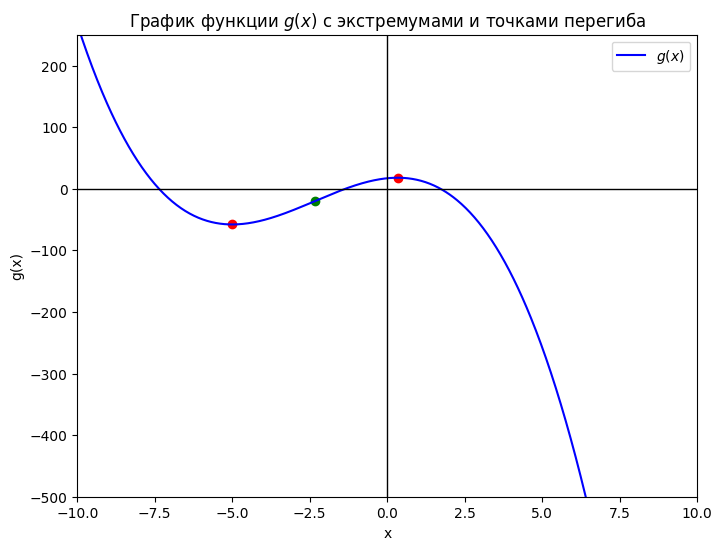

In [6]:
def find_inflection_points(func):
    second_derivative = sp.diff(func(x), x, x)
    inflection_points = sp.solve(second_derivative, x)
    inflection_x = np.array([float(ip) for ip in inflection_points if ip.is_real])
    inflection_y = np.array([float(func(ip)) for ip in inflection_x])

    return inflection_x, inflection_y

x_values = np.linspace(-10, 10, 1000)
y_values = g(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, color='blue', label=fr'$g(x)$')
plt.title(r'График функции $g(x)$ с экстремумами и точками перегиба')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()

extrema_x, extrema_y = find_extr(g)
inflection_x, inflection_y = find_inflection_points(g)
plt.scatter(extrema_x, extrema_y, c='red')
plt.scatter(inflection_x, inflection_y, c='green')

plt.xlim([-10, 10])
plt.ylim([-500, 250])

plt.show()

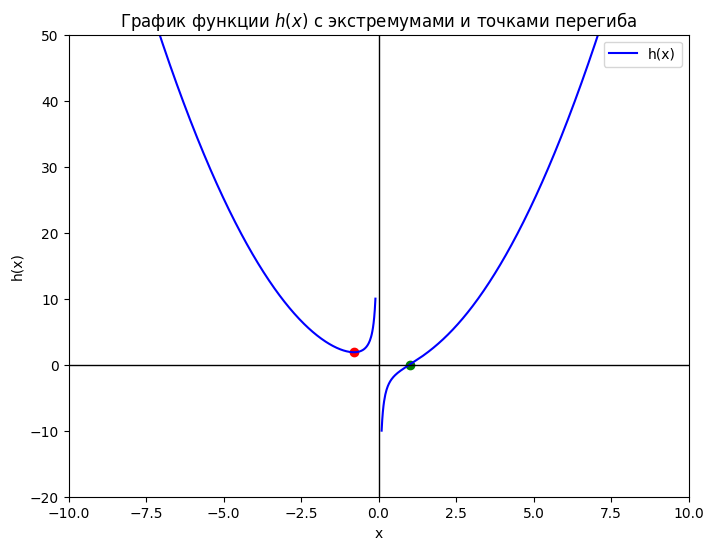

In [12]:
x_values_left = np.linspace(-10, -0.1, 500)
x_values_right = np.linspace(0.1, 10, 500)

y_values_left = [h(x) for x in x_values_left]
y_values_right = [h(x) for x in x_values_right]

plt.figure(figsize=(8, 6))
plt.plot(x_values_left, y_values_left, label="h(x)", color="blue")
plt.plot(x_values_right, y_values_right, color="blue")

plt.title(r'График функции $h(x)$ с экстремумами и точками перегиба')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()

extrema_x, extrema_y = find_extr(h)
inflection_x, inflection_y = find_inflection_points(h)
plt.scatter(extrema_x, extrema_y, c='red')
plt.scatter(inflection_x, inflection_y, c='green')

plt.xlim([-10, 10])
plt.ylim([-20, 50])

plt.show()

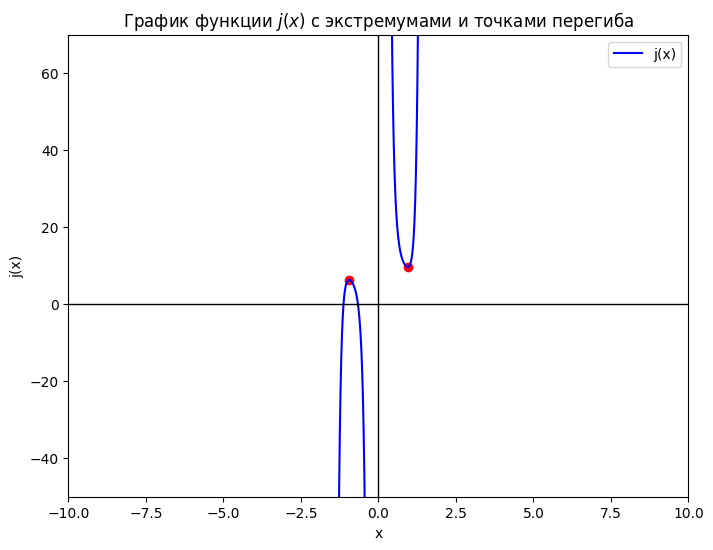

In [13]:
x_values_left = np.linspace(-3, -0.1, 500)
x_values_right = np.linspace(0.1, 3, 500)

y_values_left = [j(x) for x in x_values_left]
y_values_right = [j(x) for x in x_values_right]

plt.figure(figsize=(8, 6))
plt.plot(x_values_left, y_values_left, label="j(x)", color="blue")
plt.plot(x_values_right, y_values_right, color="blue")

plt.title(r'График функции $j(x)$ с экстремумами и точками перегиба')
plt.xlabel('x')
plt.ylabel('j(x)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()

extrema_x, extrema_y = find_extr(j)
inflection_x, inflection_y = find_inflection_points(j)
plt.scatter(extrema_x, extrema_y, c='red')
plt.scatter(inflection_x, inflection_y, c='green')

plt.xlim([-10, 10])
plt.ylim([-50, 70])

plt.show()

In [122]:
j(0.7)

13.952228131759735

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [7]:
def gradient_descent_mod(func, x_start, learning_rate, epsilon, num_iterations, delta=None):
    x_curr = x_start
    df_x = sp.diff(func(x), x)

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
      x_new = x_curr - learning_rate * df_x.subs(x, x_curr)
      trace.append(x_new)

      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace

      if delta is not None and abs(df_x.subs(x, 10)) < delta:
        return x_curr, trace

      x_curr = x_new

    return x_curr, trace

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

Локальный минимум: 15.0, найденный минимум: 15.0049849829184
Значение начального приближения: 55, learning_rate: 0.01


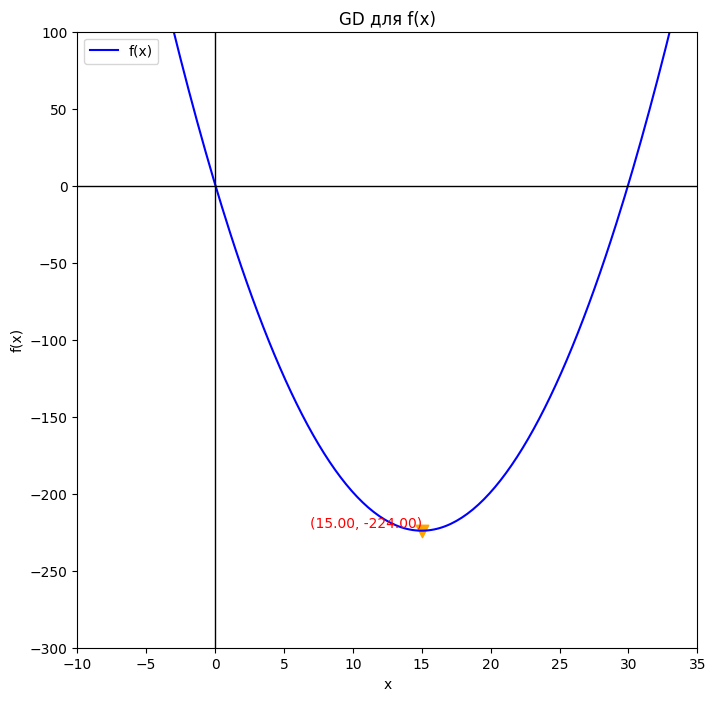

In [9]:
import random
np.random.seed(0)

x_start = random.randint(1, 100)
xmin, trace = gradient_descent_mod(f, x_start, 0.01, 0.0001, 500)
trace_value = f(xmin)

extrema_x, extrema_y = find_extr(f)
second_derivative = sp.diff(f(x), x, x)
real_min = float([point for point in extrema_x if second_derivative.subs(x, point).evalf() > 0][0])

print(f"Локальный минимум: {real_min}, найденный минимум: {xmin}")
print(f"Значение начального приближения: {x_start}, learning_rate: 0.01")

def func_plot(p1, p2, p3, func, xl, yl, xmin, ymin):

  zero_gap = False
  try:
    _ = func(0)
  except ZeroDivisionError:
    zero_gap = True

  plt.figure(figsize=(8,8))

  if zero_gap and p1 < 0 < p2:
    x_values_left = np.linspace(p1, -0.01, p3 // 2)
    y_values_left = [func(x) for x in x_values_left]
    plt.plot(x_values_left, y_values_left, color='blue', label=f'{func.__name__}(x)')

    x_values_right = np.linspace(0.01, p2, p3 // 2)
    y_values_right = [func(x) for x in x_values_right]
    plt.plot(x_values_right, y_values_right, color='blue')

  else:
    x_values = np.linspace(p1, p2, p3)
    y_values = [func(x) for x in x_values]
    plt.plot(x_values, y_values, color='blue', label=f'{func.__name__}(x)')

  plt.title(f'GD для {func.__name__}(x)')
  plt.xlabel('x')
  plt.ylabel(func.__name__+'(x)')
  plt.axhline(0, color='black',linewidth=1)
  plt.axvline(0, color='black',linewidth=1)
  plt.legend()

  plt.xlim(xl)
  plt.ylim(yl)

  plt.scatter(xmin, ymin, s=80, c='orange', marker='v')
  plt.text(xmin, ymin, f'({xmin:.2f}, {ymin:.2f})', fontsize=10, color='red', ha='right', va='bottom')

  plt.show()


func_plot(-100, 100, 1000, f, [-10, 35], [-300, 100],xmin,trace_value)

Локальный минимум: -5.0, найденный минимум: -4.99374597210458
Значение начального приближения: 7, learning_rate: 0.01


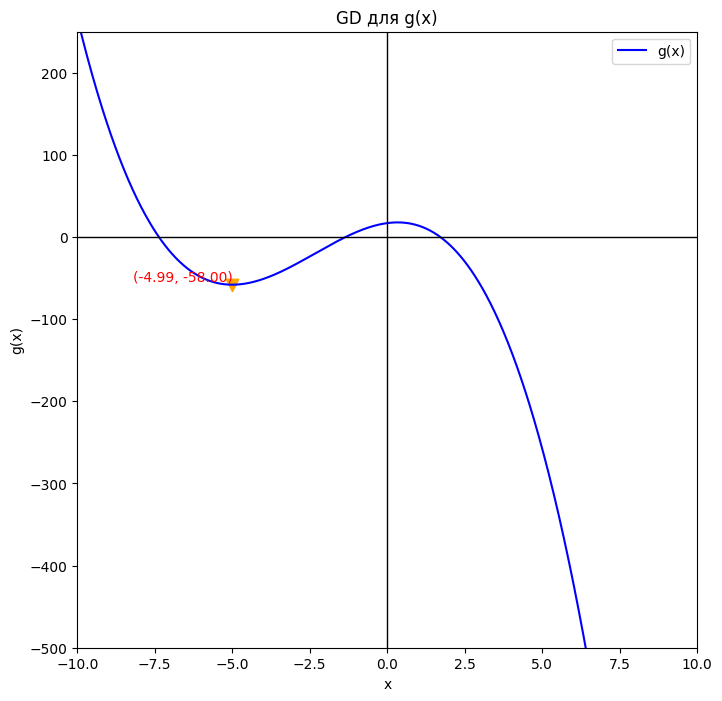

In [10]:
x_start = random.randint(-15, 15)
xmin, trace = gradient_descent_mod(g, x_start=0, learning_rate=0.001, epsilon=0.0001, num_iterations=1000)
trace_value = g(xmin)

extrema_x, extrema_y = find_extr(g)
second_derivative = sp.diff(g(x), x, x)
real_min = float([point for point in extrema_x if second_derivative.subs(x, point).evalf() > 0][0])

print(f"Локальный минимум: {real_min}, найденный минимум: {xmin}")
print(f"Значение начального приближения: {x_start}, learning_rate: 0.01")


func_plot(-10, 10, 1000, g, [-10, 10], [-500, 250],xmin, trace_value)

Локальный минимум: -0.7937005259840997, найденный минимум: -0.795300893108628
Значение начального приближения: -15, learning_rate: 0.01


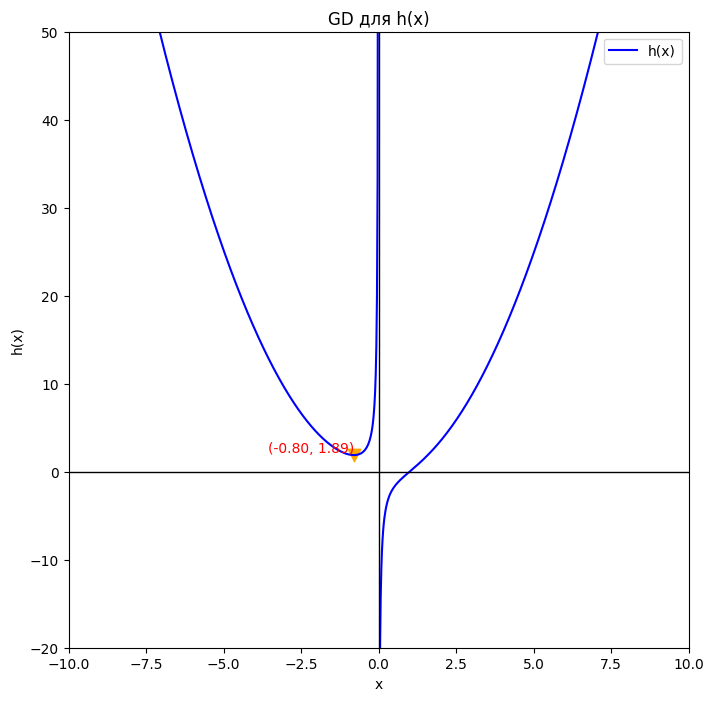

In [65]:
x_start = random.randint(-15, 15)
xmin, trace = gradient_descent_mod(h, x_start, learning_rate=0.01, epsilon=0.0001, num_iterations=1000)
trace_value = h(xmin)

extrema_x, extrema_y = find_extr(h)
second_derivative = sp.diff(h(x), x, x)
real_min = float([point for point in extrema_x if second_derivative.subs(x, point).evalf() > 0][0])

print(f"Локальный минимум: {real_min}, найденный минимум: {xmin}")
print(f"Значение начального приближения: {x_start}, learning_rate: 0.01")


func_plot(-10, 10, 1000, h, [-10, 10], [-20, 50], xmin, trace_value)

Локальный минимум: 0.9458926861215569, найденный минимум: 0.951660617182113
Значение начального приближения: 1, learning_rate: 0.01


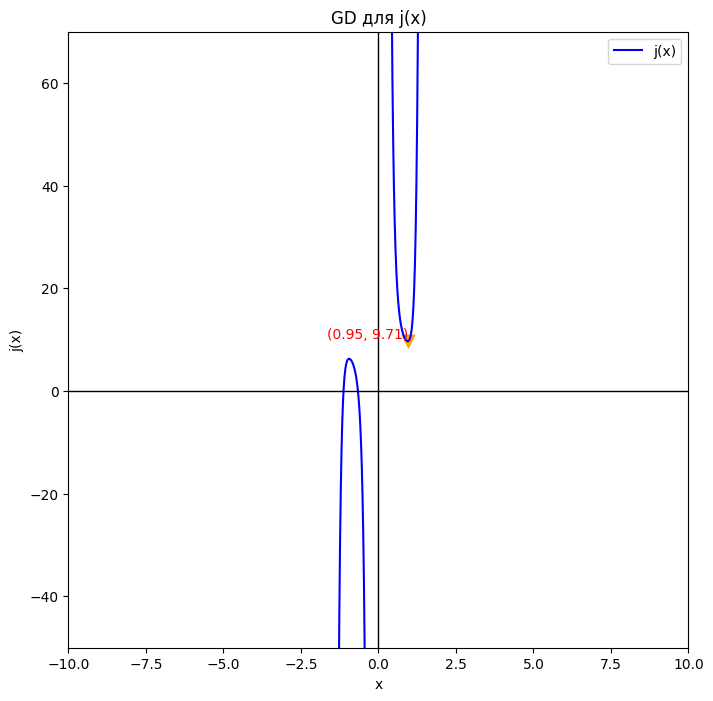

In [81]:
x_start = random.randint(1, 5)
xmin, trace = gradient_descent_mod(j, x_start, learning_rate=0.001, epsilon=0.001, num_iterations=1000, delta=0.0001)
trace_value = j(xmin)

extrema_x, extrema_y = find_extr(j)
second_derivative = sp.diff(j(x), x, x)
real_min = float([point for point in extrema_x if second_derivative.subs(x, point).evalf() > 0][0])

print(f"Локальный минимум: {real_min}, найденный минимум: {xmin}")
print(f"Значение начального приближения: {x_start}, learning_rate: 0.01")


func_plot(-3, 3, 1000, j, [-10, 10], [-50, 70], xmin, trace_value)


## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

$x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}$ (формула для вычисления шага)

In [11]:
from tqdm import tqdm

def Newtons_optimization(func, x_start, epsilon, num_iterations, alpha=1.0):
  # добавила доп. параметр затухания, без него на h(x) и j(x) метод очень надолго зависал на 8-12 итерациях из-за маленьких производных
    df_x = diff(func(x), x)
    d2f_x = diff(df_x)

    trace = []
    x_curr = x_start
    trace.append(x_curr)

    for i in tqdm(range(num_iterations), desc="Итерации", ncols=100):
        df_x_val = df_x.subs(x, x_curr)
        d2f_x_val = d2f_x.subs(x, x_curr)

        if abs(d2f_x_val) < 1e-6:
            print("Вторая производная близка к нулю, остановка метода.")
            break

        x_new = x_curr - alpha * df_x_val/d2f_x_val
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            return x_new, trace

        x_curr = x_new

    return x_curr, trace

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

Итерации:   0%|                                                    | 1/500 [00:00<00:01, 414.38it/s]


Локальный минимум: 15.0, найденный минимум: 15.0000000000000
Значение начального приближения: 74


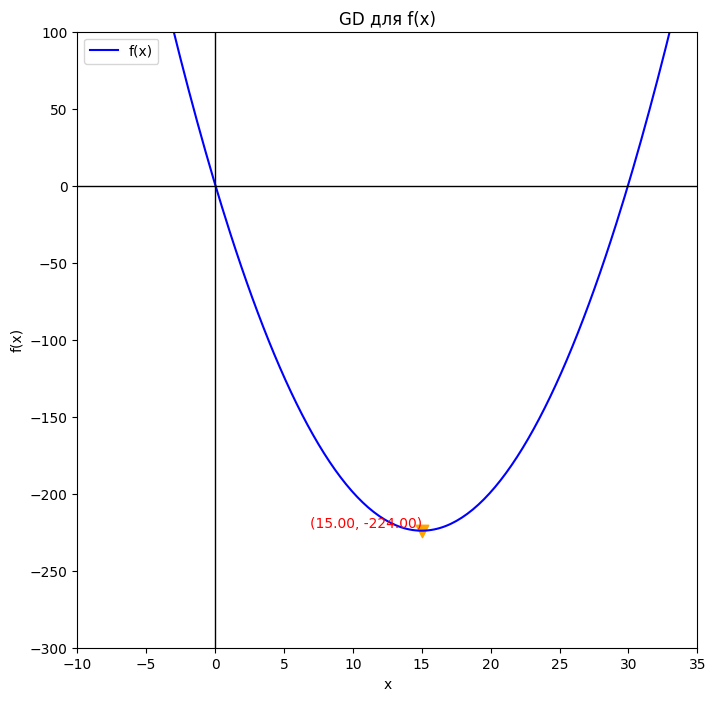

In [12]:
x_start = random.randint(1, 100)
xmin, trace = Newtons_optimization(f, x_start, 0.01, 500)
trace_value = f(xmin)

extrema_x, extrema_y = find_extr(f)
second_derivative = sp.diff(f(x), x, x)
real_min = float([point for point in extrema_x if second_derivative.subs(x, point).evalf() > 0][0])

print(f"Локальный минимум: {real_min}, найденный минимум: {xmin}")
print(f"Значение начального приближения: {x_start}")

func_plot(-100, 100, 1000, f, [-10, 35], [-300, 100],xmin,trace_value)

Итерации:   0%|▎                                                  | 5/1000 [00:00<00:02, 414.92it/s]


Локальный минимум: -5.0, найденный минимум: -5.000000000007019
Значение начального приближения: -15


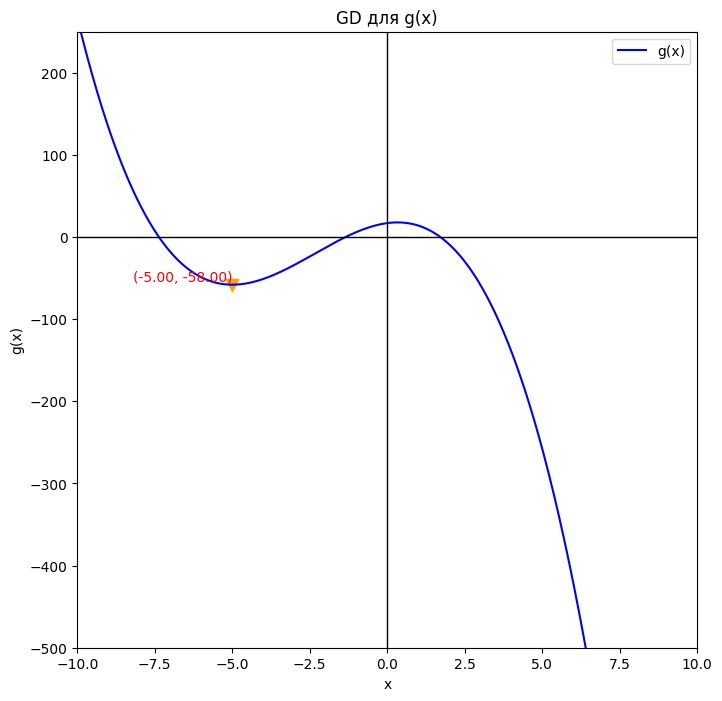

In [13]:
x_start = random.randint(-15, -1)
xmin, trace = Newtons_optimization(g, x_start, epsilon=0.001, num_iterations=1000)
trace_value = g(xmin)

extrema_x, extrema_y = find_extr(g)
second_derivative = sp.diff(g(x), x, x)
real_min = float([point for point in extrema_x if second_derivative.subs(x, point).evalf() > 0][0])

print(f"Локальный минимум: {real_min}, найденный минимум: {float(xmin)}")
print(f"Значение начального приближения: {x_start}")


func_plot(-10, 10, 1000, g, [-10, 10], [-500, 250],xmin, trace_value)

In [115]:
import scipy.optimize as opt #коробочный
def grad_g(x):
    return -3*x**2 + 5 - 14*x

result = opt.minimize(g, x0=0.2, method='Newton-CG', jac=grad_g, hess='2-point')
xmin = result.x[0]
print(f"Найденный минимум: {xmin}, значение функции в минимуме: {result.fun}")

Найденный минимум: -4.999999999999999, значение функции в минимуме: -58.000000000000014


Итерации:  11%|█████▌                                             | 11/100 [00:00<00:00, 529.55it/s]


Локальный минимум: -0.7937005259840997, найденный минимум: -0.7936998541345112
Значение начального приближения: 7


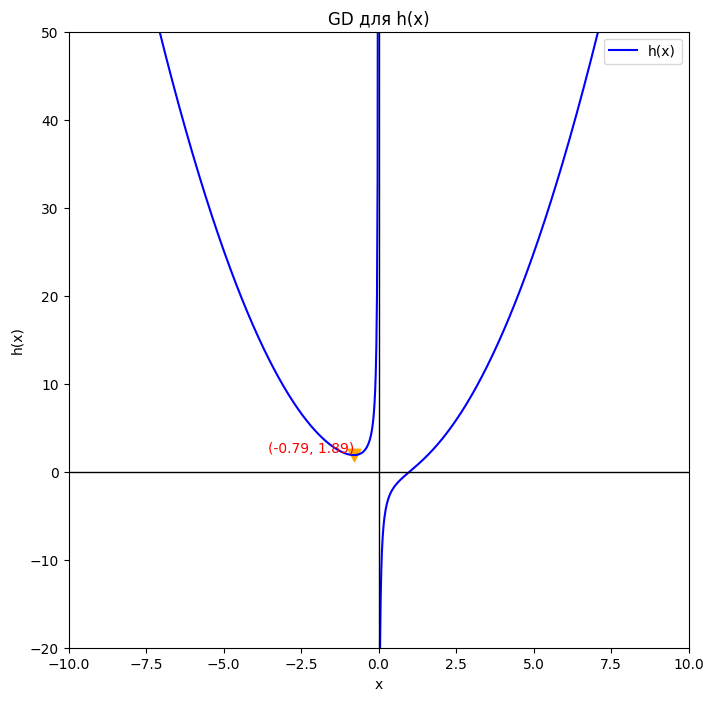

In [21]:
x_start = random.randint(-15, 15)
xmin, trace = Newtons_optimization(h, x_start, epsilon=0.001, num_iterations=100)
trace_value = h(xmin)

extrema_x, extrema_y = find_extr(h)
second_derivative = sp.diff(h(x), x, x)
real_min = float([point for point in extrema_x if second_derivative.subs(x, point).evalf() > 0][0])

print(f"Локальный минимум: {real_min}, найденный минимум: {float(xmin)}")
print(f"Значение начального приближения: {x_start}")

func_plot(-10, 10, 1000, h, [-10, 10], [-20, 50],xmin, trace_value)

Итерации:  20%|██████████▏                                        | 20/100 [00:00<00:00, 441.04it/s]


Локальный минимум: 0.9458926861215569, найденный минимум: 0.9458926874932473
Значение начального приближения: 3


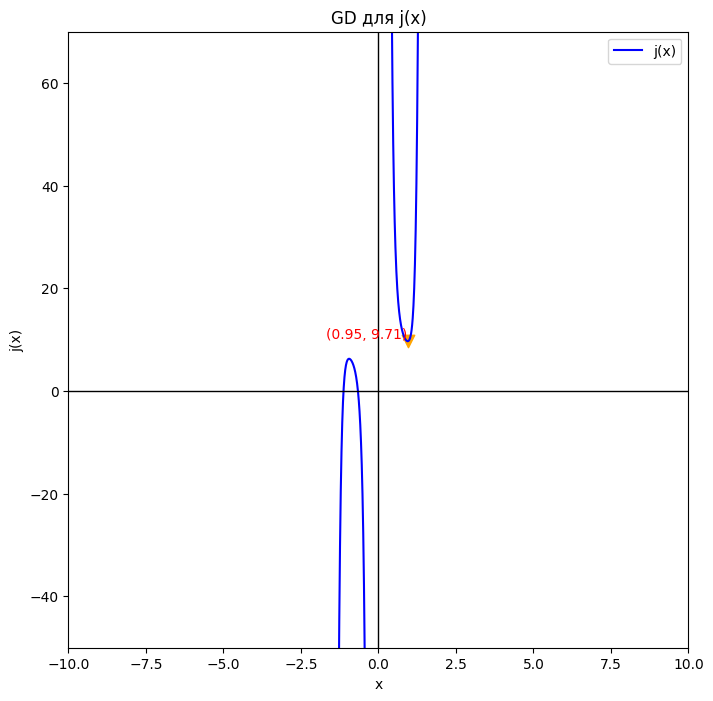

In [22]:
x_start = random.randint(1, 20)
xmin, trace = Newtons_optimization(j, x_start, epsilon=0.001, num_iterations=100)
trace_value = j(xmin)

extrema_x, extrema_y = find_extr(j)
second_derivative = sp.diff(j(x), x, x)
real_min = float([point for point in extrema_x if second_derivative.subs(x, point).evalf() > 0][0])

print(f"Локальный минимум: {real_min}, найденный минимум: {float(xmin)}")
print(f"Значение начального приближения: {x_start}")

func_plot(-3, 3, 1000, j, [-10, 10], [-50, 70],xmin, trace_value)

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [27]:
def Newtons_optimization_iter(func, x_start, epsilon, num_iterations, alpha=1.0, N=None):
    df_x = sp.diff(func(x), x)
    d2f_x = sp.diff(df_x)

    trace = []
    x_curr = x_start
    trace.append(x_curr)

    for i in range(num_iterations):
        df_x_val = df_x.subs(x, x_curr)
        d2f_x_val = d2f_x.subs(x, x_curr)

        if abs(d2f_x_val) < 1e-6:
            break

        x_new = x_curr - alpha * df_x_val / d2f_x_val
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
          return x_new, trace, i+1

        if N is not None and i+1 >= N:
          return x_new, trace, i+1

        x_curr = x_new

    return x_curr, trace, num_iterations  #для получения кол-ва итераций

def gradient_descent_mod_iter(func, x_start, learning_rate, epsilon, num_iterations, delta=None, N=None): # добавим N
    x_curr = x_start
    df_x = sp.diff(func(x), x)

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
        x_new = x_curr - learning_rate*df_x.subs(x, x_curr)
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            return x_new, trace, i+1

        if N is not None and i+1 >= N:
            return x_new, trace, i+1

        if delta is not None and abs(df_x.subs(x, 10)) < delta:
          return x_curr, trace

        x_curr = x_new

    return x_curr, trace, num_iterations

In [43]:
def test_optimization_methods(func, x_start_range, epsilon=1e-5, num_iterations=100, learning_rate=0.01, alpha=1.0, delta=None):
    x_start = random.uniform(*x_start_range)

    print(f"\nТестирование функции: {func.__name__}, x_start = {x_start:.4f}")

    try:
        xmin_gd, trace_gd, iters_gd = gradient_descent_mod_iter(func, x_start, learning_rate, epsilon, num_iterations, delta)
        print(f"Градиентный спуск: минимум = {xmin_gd:.4f}, итерации = {iters_gd}")
    except Exception as e:
        print(f"Градиентный спуск: ошибка - {e}")

    try:
        xmin_newton, trace_newton, iters_newton = Newtons_optimization_iter(func, x_start, epsilon, num_iterations, alpha)
        print(f"Метод Ньютона: минимум = {xmin_newton:.4f}, итерации = {iters_newton}")
    except Exception as e:
        print(f"Метод Ньютона: ошибка - {e}")

test_functions = [
    (f, (1, 100)),
    (g, (-10, 10)),
    (h, (0.1, 10)),
    (j, (0.1, 2))   # с ГС для j(x) с параметром epsilon=1e-5 не срослось, видимо, очень она круто растет
]

for func, x_start_range in test_functions:
    test_optimization_methods(func, x_start_range, epsilon=1e-5, num_iterations=1000, learning_rate=0.01, alpha=0.5, delta=0.0001)



Тестирование функции: f, x_start = 86.5916
Градиентный спуск: минимум = 15.0005, итерации = 589
Метод Ньютона: минимум = 15.0000, итерации = 23

Тестирование функции: g, x_start = -3.4435
Градиентный спуск: минимум = -5.0000, итерации = 62
Метод Ньютона: минимум = -5.0000, итерации = 16

Тестирование функции: h, x_start = 8.8422
Градиентный спуск: минимум = -0.7939, итерации = 320
Метод Ньютона: минимум = -0.7937, итерации = 30

Тестирование функции: j, x_start = 1.7259
Градиентный спуск: ошибка - [<class 'decimal.InvalidOperation'>]
Метод Ньютона: минимум = 0.9459, итерации = 31


```Очеивдно, что метод Ньютона справляется за меньшее число итераций, хоть вычисление второй производной и может быть более тяжелой операцией. Следовательно,он более точный при меньшем (ограниченном) количестве итераций. Во время работы столкнулась с тем,  что метод Ньютона зависал.```

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [44]:
import sympy as sp

def gradient_descent_momentum(func, x_start, learning_rate, beta, epsilon, num_iterations):
    df_x = sp.diff(func(x), x)
    x_curr = x_start
    v = 0  # инициализация скорости
    trace = [x_curr]

    for i in range(num_iterations):
        grad = df_x.subs(x, x_curr)
        v = beta*v + (1 - beta)*grad
        x_new = x_curr - learning_rate*v

        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace

        x_curr = x_new

    return x_curr, trace

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [56]:
# начального приближения? из статьи видно, что он ускоряет метод, но начальное приближение все равно приходится задавать

x_min, path = gradient_descent_momentum(f, x_start=0, learning_rate=0.1, beta=0.5, epsilon=1e-6, num_iterations=500)
print("Количество шагов для Momentum GD:", len(path))
print("Найденный минимум:", x_min)

x_min, path = gradient_descent_mod(f, x_start=0, learning_rate=0.1,epsilon=1e-6, num_iterations=500)
print("Количество шагов для обычного GD:", len(path))
print("Найденный минимум:", x_min)

Количество шагов для Momentum GD: 44
Найденный минимум: 14.9999977660077
Количество шагов для обычного GD: 69
Найденный минимум: 14.9999951791859


In [58]:
x_min, path = gradient_descent_momentum(g, x_start=0, learning_rate=0.01, beta=0.5, epsilon=1e-6, num_iterations=500)
print("Количество шагов для Momentum GD:", len(path))
print("Найденный минимум:", x_min)

x_min, path = gradient_descent_mod(g, x_start=0, learning_rate=0.01,epsilon=1e-6, num_iterations=500)
print("Количество шагов для обычного GD:", len(path))
print("Найденный минимум:", x_min)

Количество шагов для Momentum GD: 83
Найденный минимум: -4.99999651059246
Количество шагов для обычного GD: 99
Найденный минимум: -4.99999405231559


In [62]:
x_min, path = gradient_descent_momentum(h, x_start=-10, learning_rate=0.01, beta=0.5, epsilon=1e-6, num_iterations=500)
print("Количество шагов для Momentum GD:", len(path))
print("Найденный минимум:", x_min)

x_min, path = gradient_descent_mod(h, x_start=-10, learning_rate=0.01,epsilon=1e-6, num_iterations=500)
print("Количество шагов для обычного GD:", len(path))
print("Найденный минимум:", x_min)

Количество шагов для Momentum GD: 273
Найденный минимум: -0.793715350343147
Количество шагов для обычного GD: 284
Найденный минимум: -0.793716915752020


```Ну наверно прикольно, правда (если у меня все верно) буст небольшой```

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!

[Кайфующий кот](https://ibb.co/12WN7wg)

**Ответ**:  ```Кот Яны?```